### CS484/684 Computational Vision

# Homework Assignment 0

This assignment is a teaser/refresher on calculus, linear algebra, and includes exercises on lenses, image gradients, point processing, and harris corners. It also introduces you to jupiter notebook enviroment and python. Notebook environment allows you to combine cells with python code and cells with text (markdown cells). Text cells can include "latex" mathematical formulas. Such formulas can be written in the inline mode, for example, $(x+y)^2=x^2+2xy+y^2$. Important or longer formulas may look better in a show mode, e.g. $$1=\sum_{n=1}^{\infty}\left(\frac{1}{2}\right)^n.$$ 
Latex is commonly used for scientific writing and you should use it for the written parts of your assignments. You should use text cells (markdown cells) to answer written questions or to present your explanations/comments in notebook reports with code. A list of common mathematical symbols in latex can be easily found online (e.g. https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols). You can also find many online resources explaining latex for matematical equations, e.g. https://en.wikibooks.org/wiki/LaTeX/Advanced_Mathematics.

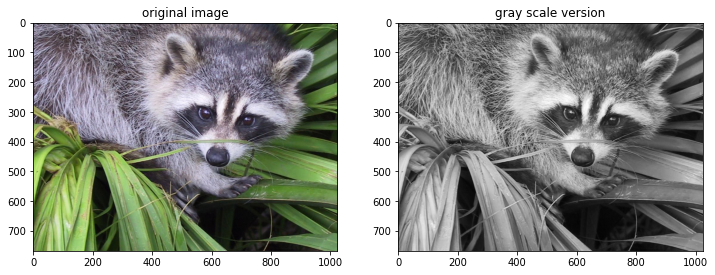

In [1]:
# This cell loads some libraries and a test image you can use. Feel free to load your own images
# but you must save them in "images" subdirectory before creating .zip for your submission.

%matplotlib inline
                     # NOTE: all "magic" options for backend plotting are: inline, notebook, and "external" (default) 
                     # see  http://ipython.readthedocs.io/en/stable/interactive/plotting.html for details
import numpy as np
import matplotlib
import matplotlib.image as image
import matplotlib.pyplot as plt
from scipy import misc
from skimage.color import rgb2gray

im = misc.face()     # a sample image in misc library
#im=image.imread("../images/IMG_3306.jpg") # another image (loaded from your file), uncomment one 

plt.figure(1,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(rgb2gray(im),cmap="gray")
plt.title("gray scale version")
plt.show()

# Problem 1

#####  Use the following three cells to write your own python functions that take an arbitrary RGB image and outputs its greyscale version. The functions' input should be an RGB image. The computed greyscale image should be a 2D array of the same size as the input image. You should write your own code for converting colored images to greyscale images without using any standard functions like $rgb2gray$ from "skimage" in the cell above, or any other image library for python.  Treat greyscale value as an $average$ of the corresponding R G and B values. You should write three versions A, B, and C, as detailed in each cell below. 

In [2]:
# Solution A: (for-loops)
# In this version you should explicitly use two nested for-loops traversing individual pixels 
# of the input image, computing the average of R, G, and B values for each pixel, and copying them
# to the corresponding element of the output matrix (gray-scale image).
def toGrayScale_A(color_image):
    gray_image = []
    for row in color_image:
        gray_image.append([])
        for pixel_array in row:
            gray_image[-1].append(
                sum(pixel_array) / len(pixel_array)
            )
    return gray_image

In [3]:
# Solution B: (basic numpy operators for matrix operations)
# In the next two versions you can't use for-loops (or other loops) explicitly traversing pixels. 
# In B below you should first separate image colors into individual 2D arrays (matrices) R,G and B 
# using "slicing" or "reshaping" (e.g. see Filtering.ipynb in Code/Samples - course web page) 
# and then compute the average of these matrices 0.3333*(A+B+C) directly using numpy operators + and * 
# for adding and scaling matrices. HINT: your code can look like linear algebraic expresion above.
def toGrayScale_B(color_image):
    gray_image_shape = (color_image.shape[0], color_image.shape[1], 1)
    R = color_image[:,:,0].reshape(gray_image_shape)
    G = color_image[:,:,1].reshape(gray_image_shape)
    B = color_image[:,:,2].reshape(gray_image_shape)
    return (0.3333) * (
        R.astype(np.uint32) + 
        G.astype(np.uint32) + 
        B.astype(np.uint32)
    )

In [4]:
# Solution C: (vectorized functions)
# In this version you should use numpy function 'dot' applying it 
# directly to colored image (3d array) and vector [0.33,0.33,0.33] defining weights 
# for each color component. 
def toGrayScale_C(color_image):
    return np.dot(color_image, np.array([0.33, 0.33, 0.33]))

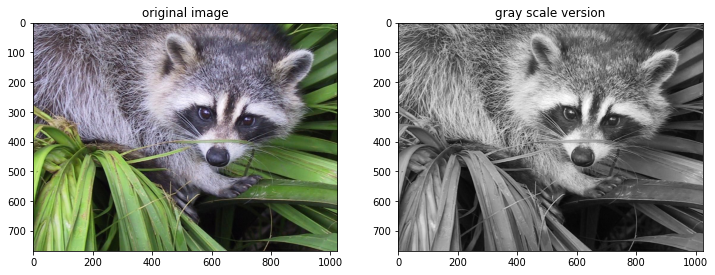

CPU times: user 4.73 s, sys: 66.9 ms, total: 4.8 s
Wall time: 4.81 s


In [5]:
%%time
# Test your code for version A in this cell.
plt.figure(2,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(toGrayScale_A(im),cmap="gray")
plt.title("gray scale version")
plt.show()

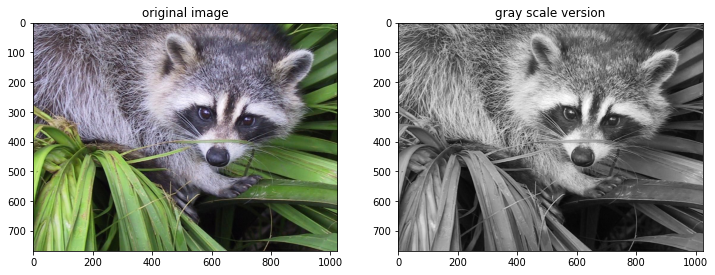

CPU times: user 506 ms, sys: 33 ms, total: 539 ms
Wall time: 541 ms


In [6]:
%%time
# Test your code for version B in this cell.
plt.figure(3,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(toGrayScale_B(im),cmap="gray")
plt.title("gray scale version")
plt.show()

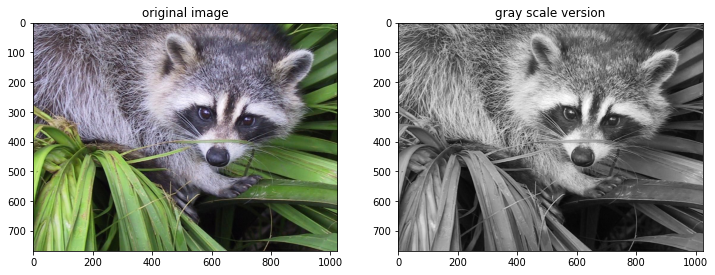

CPU times: user 520 ms, sys: 39.6 ms, total: 560 ms
Wall time: 559 ms


In [7]:
%%time
plt.figure(4,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(toGrayScale_C(im),cmap="gray")
plt.title("gray scale version")
plt.show()

##  ATTENTION: problem 1 should teach you NEVER to use for-loops (or any other loops) when working with images or matrices! <font color=red> Later in this course, your marks will be significantly reduced if your code explicitly traverses matrix elements. </font> You should always use basic 'numpy' operators for matrices that make your code both efficient and simple. In many cases they will make your code look exactly like linear algebraic equations. When basic linear algebraic operators are not enough, you should look for appropriate "vectorized" functions (e.g. like 'dot'). We will often provide hints for what vectorized functions you can use. Learning how to use vectorized functions is significant for properly coding in 'numpy'.

# Problem 2

##### Write code that randomly shuffles all image pixels using function numpy.random.shuffle. Show some test case (original image and result).

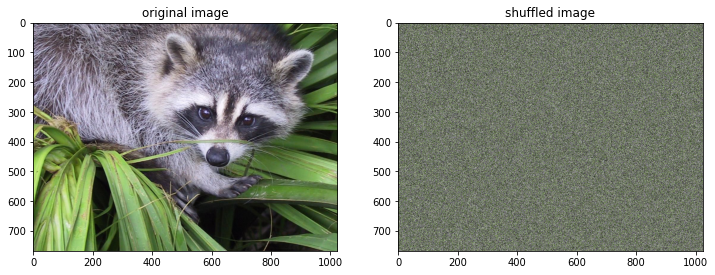

In [8]:
# Solution: write your code in this cell. Show one image and a result of shuffling.
plt.figure(5, figsize=(12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
shuffle_im_1d = im.copy().reshape(im.shape[0]*im.shape[1], 3)
np.random.shuffle(shuffle_im_1d)
plt.imshow(shuffle_im_1d.reshape(im.shape))
plt.title("shuffled image")
plt.show()

# Problem 3

##### Define domain transformation functions $t_x(x,y)$ and $t_y(x,y)$ that reflects an image in the pixel $(x_c,y_c)$. You can assume real-valued precision.

Solution: (show your work in this "Markdown" cell using basic text and latex for formulas, make sure you "run" this and other text or code cells before saving your notebook for submission so that it is easy to read and evaluate your writings and results). You can add empty lines to create new paragraphs in text (markdown) cells, as here...

My solution is $$\begin{eqnarray} t_x(x,y)&=& 2x_c - x \\ t_y(x,y)&=& 2y_c - y     \end{eqnarray}$$

Use only plain text (no boldface or ### heading) in your solutions so that it is easier to distinguish your work from the provided problem statements. However, if necessary, you can insert additional cells, if that helps the structure your solution. 

Do not change the order of the problems. Once you completed all written and code cells, run $$\text{Kernel->Restart & Run All}$$ to generate a final "gradable" version of your notebook and save your ipynb file. Also use $$\text{File->Print Preview}$$ and then print your report from your browser into a pdf file. Submit both .pdf and .ipynb files.

# Problem 4

##### As stated in the lectures (topic 2), assuming fixed "image distance" a lens generates perfectly sharp image only for 3D points at some particular depth. Assuming an object has sharp image when image distance is $h$ and that the focal length of the lens  $f$  is known, what is the object’s depth $$d(h) = ?$$ Your solution should show your derivation. HINT: Use the illustration below to find similar triangles and to identify where the focal length $f$ of the lens is relevant. <img src="images/fig for problem_4.png">

Solution: (use text and latex formulas to justify/explain. Feel free to replace an image above with a modified version including your scribbles.)

Using the image below, we find similar triangles to come up with an equation for the object's depth, $d$, with respect to the image distance, $h$, and the known focal length, $f$.

<img src="images/problem_4_soln_1.png">

First, to generalize this analysis to any lens, we define the lens center to be the origin $(0,0)$ point which leads to negative values to values left and below this point. These have been marked up with orange negative signs.

Additionally, we marked the location of the focal length point $f$ and its negative $-f$ in orange. This will be helpful when identifying similar triangles.

Next, the first similar triangle we find is shown using the pink markups. The angles with one pink stripe are equal because they are opposite of each other and are formed using the same straight lines. Further, the corner pink markups have the same 90° angle. Finally, we can form two triangles using the one pink stripe angle, the two pink stripes angle, and the corner pink angle markups. Since the one pink stripe and corner pink markup angles are equal, the two pink stripes angles **must be equal**. Because the two traingles formed have the same angles, the ratio of their lengths must be the same making them "similar triangles". This leads to the first equation:

$$\frac{A}{-d} = \frac{-A'}{h}$$

Using the same reasoning for the traingles formed with the cyan markups, we find another pair of "similar triangles". This leads to the following equation:

$$\frac{A}{f} = \frac{-A'}{h - f}$$

Substituting the first equation into the second equation we get the following:

$$\begin{eqnarray}
    \frac{\frac{-A' \cdot -d}{h}}{f} &=& \frac{-A'}{h - f} \\ \frac{-d}{f \cdot h}
                                     &=& \frac{1}{h - f} \\ d
                                     &=& \frac{-f \cdot h}{h - f} \\
                                   d &=& \frac{f \cdot h}{f - h}
\end{eqnarray}$$

Therefore, we remark that if the focal point, $f$, is known, we can write an equation for $d(h)$ as:

$$ d(h) = \frac{fh}{f - h}$$

This is also known as "the lens formula" and is sometimes written as:

$$ \frac{1}{f} = \frac{1}{d} - \frac{1}{h} $$

Also, if we hadn't generalized this equation, it would not have the negative sign on $d$ and could be written as:

$$ d(h) = \frac{fh}{h - f} $$

# Problem 5

##### (a) Find all points $x\in R^1$ corresponding to local minima for function $f(x) = 2x^3 + x^2 - x$. Show your derivation.

Solution: (write your solution in this cell)

First, we find the derivative equation:

$$\begin{eqnarray} \frac{\partial f(x)}{\partial x} &=& \frac{\partial}{\partial x} (2x^3 + x^2 - x) \\ &=& 6x^2 + 2x - 1 \end{eqnarray}$$

Next, we find the critical points by solving $\frac{\partial f(x)}{\partial x}$ for when it equals 0:

$$\begin{eqnarray} 6x^2 + 2x - 1 &=& 0 \\ (x - \frac{-1 - \sqrt{7}}{6})(x + \frac{-1 + \sqrt{7}}{6}) &=& 0\end{eqnarray}$$

This leads to the following critical points:

$$ x = \frac{-1 \pm \sqrt{7}}{6} $$


Determining whether these points are local minimums can be done so by first finding the second derivate $ \frac{\partial^2 f(x)}{\partial x^2} $:

$$\begin{eqnarray} \frac{\partial^2 f(x)}{\partial x^2} &=& 12x + 2 \end{eqnarray}$$

Next, we plug these values into $\frac{\partial^2 f(x)}{\partial x^2} $.

For $x = \frac{-1 + \sqrt{7}}{6}$ we get the following:

$$12(\frac{-1 + \sqrt{7}}{6}) + 2 \approx 5.29 $$

<center>$5.29 > 0$ therefore this value is a local minimum.</center>

For $x = \frac{-1 - \sqrt{7}}{6}$ we get the following:

$$12(\frac{-1 - \sqrt{7}}{6}) + 2 \approx -5.29$$

<center>$-5.29 < 0$ therefore this value is not a local minimum.</center>

Therefore, the local minima of $f(x)$ are found at

$$ x = \frac{-1 + \sqrt{7}}{6}$$

##### (b) Consider the following function of two variables $f(x,y) = yx^2 - xy^2+3y$ and find all points with zero gradient $\nabla f = 0$. HINT: you need to find all solutions $(x,y)\in R^2$ to the following system of equations $$\left\{\begin{align} \frac{\partial f}{\partial x} & =  0 \\  \frac{\partial f}{\partial y}  & =  0 \end{align}  \right.$$

Solution: (write your solution in this cell)

Finding the partial derivate with respect to $x$:

$$\begin{eqnarray} \frac{\partial f}{\partial x} &=& \frac{\partial}{\partial x} yx^2 - xy^2 + 3y \\ &=& 2xy - y^2\end{eqnarray}$$

Next we solve $\frac{\partial f}{\partial x} = 0$. This lets us write $y$ in terms of $x$:

$$\begin{eqnarray} 2xy - y^2 &=& 0 \\ 2xy &=& y^2 \\ y &=& 2x \end{eqnarray}$$

Next, finding the partial derivate with respect to $y$:

$$\begin{eqnarray} \frac{\partial f}{\partial y} &=& \frac{\partial}{\partial y} yx^2 - xy^2 + 3y \\ &=& x^2 - 2xy + 3\end{eqnarray}$$

Likewise, solving $\frac{\partial f}{\partial y} = 0$ should let us write $y$ in terms of a new equation using $x$:

$$\begin{eqnarray} x^2 - 2xy + 3 &=& 0 \\ 2xy &=& x^2 + 3 \\ y &=& \frac{x^2 + 3}{2x} \\ y &=& \frac{x}{2} + \frac{3}{2x} \end{eqnarray}$$

Since we're looking for all solutions $(x, y)$ such that both $\frac{\partial f}{\partial x} = 0$ and $\frac{\partial f}{\partial y} = 0$ are true, we are looking to find points such that $y = 2x$ from $\frac{\partial f}{\partial x}$ above intersects with $y = \frac{x}{2} + \frac{3}{2x}$ from $\frac{\partial f}{\partial y}$ above.

Therefore we solve the following:

$$\begin{eqnarray} y &=& y \\ 2x &=& \frac{x}{2} + \frac{3}{2x} \\ 4x^2 &=& x^2 + 3 \\ 3x^2 &=& 3 \\ x^2 &=& 1 \\ x &=& \pm 1 \end{eqnarray}$$

Finally, we can plug $x = \pm 1$ back into either equation to get the values of $y$ and therefore the points with zero gradient $\nabla f = 0$:

For x = +1:

$$ y = 2(1) = 2 $$

For x = -1:

$$ y = 2(-1) = -2 $$

The points therefore are:

$$ (-1, -2)\ \&\ (1, 2) $$

##### (c) Use "matplotlib" to display a 3D plot for function f(x,y) over the domain $(x,y)\in[-4,4]\times [-3,3] $. Write your code in the cell below. Make sure you "run" the cell with your code below before saving and submitting your notebook. This will make your plot (the output of your code) visible when the notebook is opened for grading.

<IPython.core.display.Javascript object>


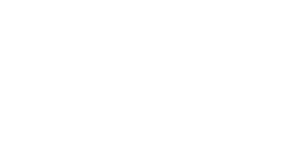

In [9]:
# Solution: write your code in this cell
%matplotlib notebook
# NOTE: unlike "inline" mode activated in earlier cells, "notebook" allows interactive plots

import matplotlib.pyplot as plt

def threeD_fun(x, y):
    return y*x**2 - x*y**2 + 3*y

X_LIM = (-4, 4)
Y_LIM = (-3, 3)

STEP = 0.05

fig = plt.figure()
ax = fig.gca(projection='3d')
x_vals = np.arange(*X_LIM, STEP)
y_vals = np.arange(*Y_LIM, STEP)
X, Y = np.meshgrid(x_vals, y_vals)
f_vals = np.array(threeD_fun(np.ravel(X), np.ravel(Y)))
F_VALS = f_vals.reshape(X.shape)
ax.plot_surface(X, Y, F_VALS)
ax.set_xlim(*X_LIM)
ax.set_ylim(*Y_LIM)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.title('3D plot for f(x,y)')

plt.show()

##### (d) Visualize vector field of gradients for $f(x,y)$ over the same domain $-4<x<4, -3<y<3 $. See one of the posted demo notebooks for inspiration.

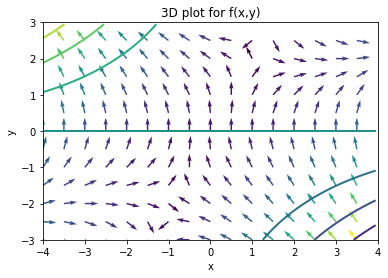

In [10]:
# Solution: write your code in this cell
# HINT: no need to repeat declaration ""%matplotlib notebook" if this cell is run after previous one.

%matplotlib inline

from matplotlib.pyplot import cm

def threeD_fun_partial_x(x, y):
    return 2*x*y - y**2

def threeD_fun_partial_y(x, y):
    return x**2 - 2*x*y + 3

U = threeD_fun_partial_x(X, Y)
V = threeD_fun_partial_y(X, Y)
norm = np.linalg.norm(np.array([U, V]), axis=0)
U = U / norm # using norm creates nicer symmetric arrows
V = V / norm # and lets color describe magnitude instead

REP_BOX_W = 10 # one vector per box of size REP_BOX_W*REP_BOX_W
plt.quiver(X[::REP_BOX_W, ::REP_BOX_W],
           Y[::REP_BOX_W, ::REP_BOX_W],
           U[::REP_BOX_W, ::REP_BOX_W],
           V[::REP_BOX_W, ::REP_BOX_W],
           norm[::REP_BOX_W, ::REP_BOX_W],
#            cmap=cm.seismic # Default looked nice
          )
plt.contour(
    X,
    Y,
    F_VALS,
    linewidths=2,
#     cmap=cm.seismic.
)

plt.xlim(*X_LIM)
plt.ylim(*Y_LIM)
plt.xlabel('x')
plt.ylabel('y')
plt.title('3D plot for f(x,y)')

plt.show()

# Problem 6

##### Prove that median filtering in not a linear image transormation. HINT: find a counter example showing that for some vectors of the same dimensions $A$ and $B$, $$Med(A + B)\neq Med(A) + Med(B)$$  where operation $Med(X)$ returns median of the elements of vector $X$.

Solution: (write your solution in this cell)

Proof by counter-example:

Let $A = \left[\begin{array}{cc} 1\\ 2 \\ 3 \end{array}\right]$

Let $B = \left[\begin{array}{cc} 0\\ -1 \\ 1 \end{array}\right]$

Which means that, $A + B = \left[\begin{array}{cc} 1\\ 1 \\ 4 \end{array}\right]$

Correspondingly,

$$Med(A) = 2$$

$$Med(B) = 0$$

$$Med(A + B) = 1$$

However,

$$Med(A + B) \neq Med(A) + Med(B)$$

because

$$ 1 \neq 2 + 0 $$

which means the additivity property required of a linear image transformation is violated.

This means median filter is not a linear image transformation.

# Problem 7

##### (a) Image differentiation: Write code for a python function that estimates partial derivatives $d(x,y):=\frac{\partial}{\partial y} f(x,y)$ of any greyscale image $f$ with respect to variable $y$. The function should return a real-valued matrix of the same size as the input image $f$. Use central difference approximation $$\frac{\partial}{\partial y} f(x,y)\approx \frac{f(x,y+\Delta)-f(x,y-\Delta)}{2\Delta}$$ where $\Delta$ is the distance between pixels (use $\Delta=1$). You are not allowed to use colvolution (as in the sample notebook "convolution.ipynb"). <font color=red> GENERAL NOTE ON NUMPY: while woirking with matrices in numpy, one should stay away from using double for-loops for traversing the elsements. This is highly inefficient and numpy has many functions to avoid this that you will eventually learn. </font> For example, for this excercise you can use numpy.roll to compute image with pixels shifted to the left or right and use linear operations over images as matrices (pointwise addition/subtraction).

In [11]:
# Solution: write your code in this cell
def estimate_partial_derivates(img):
    img_grad_middle = (img[2:,:] - img[:-2,:]) / 2
    img_grad_top = (img[[1],:] - img[[0],:]) / 2
    img_grad_bottom = (img[[-1],:] - img[[-2],:]) / 2
    img_grad = np.concatenate(
        (img_grad_top, img_grad_middle, img_grad_bottom),
        axis=0
    )
    return img_grad


##### (b) Point processing: find linear range transofrmation function $t(d)$ that $rescales$ partial derivatives $d=\frac{\partial}{\partial y} f$ computed above to values in the range $[0,255]$ so that $t(d_{max})=255$ for the maximum observed value of partial derivative $d_{max}$ and $t(d_{min})=0$ for the minimum derivative $d_{min}$. Compute the transformed grayscale image $g(x,y) = t(d(x,y))$ and display both $f$ and $g$. As input $f$ you can use any grayscale image.

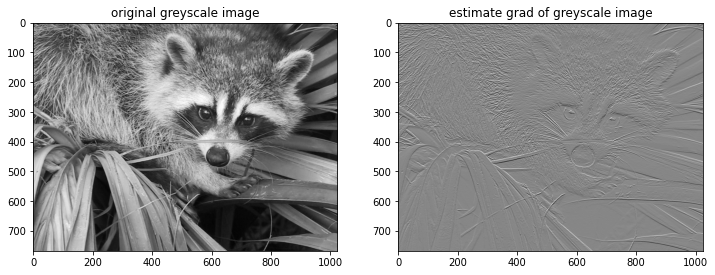

In [12]:
# Solution: write your code in this cell
def transform_partial_derivative_estimate(grad_img):
    transform_img = (255 * (
        (grad_img - np.min(grad_img)) / np.ptp(grad_img)
    )).astype(int)
    return transform_img


img_f = rgb2gray(im)
img_g = transform_partial_derivative_estimate(
    estimate_partial_derivates(img_f)
)

plt.figure(6, figsize= (12, 8))
plt.subplot(121)
plt.imshow(img_f, cmap="gray")
plt.title("original greyscale image")
plt.subplot(122)
plt.imshow(img_g, cmap="gray")
plt.title("estimate grad of greyscale image")
plt.show()

##### (c) Write code demonstrating partial derivatives for the same image with substantial amount of added Gaussian noise (you can use code for noise generation from Filtering.ipynb).

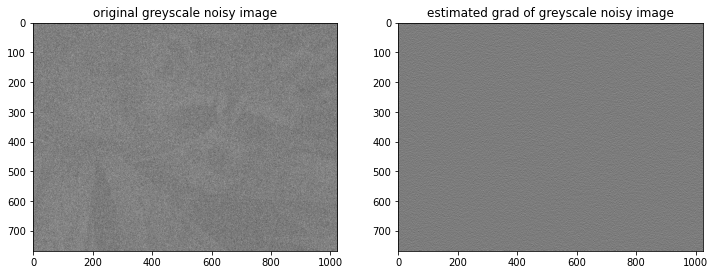

In [13]:
# Solution: write your code in this cell

# generating image with gaussian noise - from Filtering.ipynb
sigma = 2 # I thought 2 was enough to be 'substantial' 
          # but you can also still kind of make out the image
gauss_noise = np.random.normal(
    0.0,
    sigma,
    (img_f.shape[0], img_f.shape[1])
)
img_f_noisy = img_f + gauss_noise

img_g_noisy = transform_partial_derivative_estimate(
    estimate_partial_derivates(img_f_noisy)
)

plt.figure(6, figsize= (12, 8))
plt.subplot(121)
plt.imshow(img_f_noisy, cmap="gray")
plt.title("original greyscale noisy image")
plt.subplot(122)
plt.imshow(img_g_noisy, cmap="gray")
plt.title("estimated grad of greyscale noisy image")
plt.show()

# Problem 8

##### (a) In this problem we use $\nabla I (x,y)$ to denote a gradient of image inensities at point $(x,y)$ only to emphasize this dependence of the gradient on location. Assume that $\nabla I (x,y)$  is a non-zero vector at a given point $(x,y)$. What is the rank of matrix $\nabla I(x,y) \cdot \nabla I^T(x,y)$ and why?

Solution: (formal arguments)

The gradient of image intensities at point $(x,y)$, $\nabla I(x,y)$ can be represented as a vector composed of a partial derviate in the $x$ direction, $I_x$ and a partial derivative in the $y$ direction, $I_y$, as follows

$$\nabla I(x,y) = \left[\begin{array}{cc} I_x \\ I_y \end{array}\right]$$

Using this definition in the matrix multiplication between $\nabla I(x,y)$ and $\nabla I^T(x,y)$ we attain the following matrix product:

$$\begin{eqnarray} 
    \nabla I(x,y) \cdot \nabla I^T(x,y) &=& \left[\begin{array}{cc} I_x \\ I_y \end{array}\right] \cdot \left[\begin{array}{cc} I_x & I_y \end{array}\right] \\
                                        &=& \left[\begin{array}{cc} I_x^2 & I_xI_y \\ I_yI_x & I_y^2 \end{array}\right]
                                        \end{eqnarray}$$
                                        
Let $A = \left[\begin{array}{cc} I_x^2 & I_xI_y \\ I_yI_x & I_y^2 \end{array}\right]$

Next, we can row reduce matrix $A$ to Row-Echelon Form by doing the operation $R_2 \rightarrow r_2 - \frac{I_y}{I_x}r_1$. This relies on the fact that the vector $\nabla I (x,y)$ is a non-zero vector. If $I_x$ is non-zero there is no issue with this row operation. If $I_x$ _is_ 0, then $I_y$ must be non-zero and the row operation changes to $R1 \rightarrow r_1 - \frac{I_x}{I_y}r_2$. In both cases we will get a row of zeros.

Therefore, the matrix becomes

$$\left[\begin{array}{cc} I_x^2 & I_xI_y \\ 0 & 0 \end{array}\right]$$

Let $B = \left[\begin{array}{cc} I_x^2 & I_xI_y \\ 0 & 0 \end{array}\right]$

Because of the row of zeros on the bottom, the matrix $B$ has a _free variable_. The basis formed by the columns of $B$ has dimension of 1 because it only has a single leading 1.

Since the rank of a matrix is equal to the dimension of a basis set for its columns, in this case, **the rank is 1**.

##### (b) Assume that an image patch (window $w$) contains a straight intensity edge (as in window $W_b$ below). What should be the rank of Harris matrix  at that patch/window $M_w = \sum_{(x,y)\in w} \nabla I(x,y) \cdot \nabla I^T(x,y)$ and why? 

NOTE: here we assume that $w$ stands for a subset of pixels in the window, rather than 0-1 indicator function for this window (as in the lecture notes). Both types of notation is common. While 0-1 indicators $w(x,y)$ easily extend to weighted support functions, we do not need this generality for this excercise and preferred a slightly simpler set notation. <img src="images/fig for problem_8.png">

Solution:

At position $(x,y)$, the gradient $\nabla I(x,y)$ is a vector composed of a partial derviate in the $x$ direction, $I_x$ and a partial derivative in the $y$ direction, $I_y$, as follows:

$$ \nabla I (x,y) = \left[\begin{array}{cc} I_x \\ I_y \end{array}\right] $$

This means the matrix multiplication operation $\nabla I(x,y)$ and $\nabla I^T(x,y)$ produces the following matrix product:

$$\begin{eqnarray} 
    \nabla I(x,y) \cdot \nabla I^T(x,y) &=& \left[\begin{array}{cc} I_x \\ I_y \end{array}\right] \cdot \left[\begin{array}{cc} I_x & I_y \end{array}\right] \\
                                        &=& \left[\begin{array}{cc} I_x^2 & I_xI_y \\ I_yI_x & I_y^2 \end{array}\right]
                                        \end{eqnarray}$$
                                        
Let $A = \left[\begin{array}{cc} I_x^2 & I_xI_y \\ I_yI_x & I_y^2 \end{array}\right]$

For any pair $(x,y)$ that is not an edge, the partial derivates $I_x$ and $I_y$ will both be 0. This means the resultant $\left[\begin{array}{cc} 0 & 0 \\ 0 & 0 \end{array}\right]$ matrix will not contribute to the summation that makes up $M_w$.

For any pair $(x,y)$ on the edge, at least one of $I_x$ and $I_y$ are non-zero. This is because the gradient in at least one of either the $x$ direction or the $y$ direction crosses-over from some darker color to a lighter color (or vice-verse).

Finally, summing over only the points on the edge, we get the following:

$$\begin{eqnarray}M_w 
        &=& \sum_{(x,y)\in w} A \\
        &=& \sum_{(x,y)\in edge} \left[\begin{array}{cc} I_x^2 & I_xI_y \\ I_yI_x & I_y^2 \end{array}\right] \\
        &=& \left[\begin{array}{cc}
                    \sum_{(x,y)\in edge}I_x^2 & \sum_{(x,y)\in edge}I_xI_y \\ 
                    \sum_{(x,y)\in edge}I_yI_x & \sum_{(x,y)\in edge}I_y^2 
                  \end{array}
            \right] \\
        \end{eqnarray}$$

We can write $M_x$ in Row-Echelon Form by doing the operation $R_2 \rightarrow r_2 - \frac{I_y}{I_x}r_1$. Like in part a), it is important that at least one of $I_x$ or $I_y$ is non-zero. Here, $I_x$ is non-zero:

$$\left[
    \begin{array}{cc}
        \sum_{(x,y)\in edge}I_x^2 & \sum_{(x,y)\in edge}I_xI_y \\
        0 & 0
    \end{array}
\right]$$

If $I_x$ was zero we would just do the row operation on $R_1$ instead because $I_y$ would necessarily be non-zero. It would be $R_1 \rightarrow r_1 - \frac{I_x}{I_y}r_2$ and the matrix would still get a row of zeros:

$$\left[
    \begin{array}{cc}
        0 & 0 \\
        \sum_{(x,y)\in edge}I_yI_x & \sum_{(x,y)\in edge}I_y^2 \\
    \end{array}
\right]$$

This works because the gradients $I_x$ and $I_y$ are the same everywhere on the _same_ edge. This is not a corner so all the points on the edge have the same $I_x$ and $I_y$ gradients.

In either case, the resultant matrix will always have a row of zeros on the bottom. This means that the basis formed by the columns of $M_w$ has only one leading 1.

Since the rank of $M_w$ is equal to the dimension of a basis set for its columns, the rank of Harris matrix $M_w$ at that patch/window **is 1**.

##### (c) What is the rank of Harris matrix at a patch/window containing a corner at an intersection of two straight edges  (as in $W_c$ above)? Provide a formal proof.

Solution:

As in part b) above, let $A = \left[\begin{array}{cc} I_x^2 & I_xI_y \\ I_yI_x & I_y^2 \end{array}\right]$

A patch/window containing a corner can be defined in terms of two edges, $e_1$ and $e_2$, with different slopes and which intersect at the corner. The line formed by connecting these two edges separates two colors.

For any pair $(x,y)$ that is not on either edge, the partial derivates $I_x$ and $I_y$ will both be 0. This means they will not contribute to the summation that makes up $M_w$.

For any pair $(x,y)$ on either edge, at least one of $I_x$ and $I_y$ are non-zero.
 
We arbitrairly select $e_1$ as the edge for which both the $x$ gradient and $y$ gradient are in the same direction (the order in which each gradient sees the two different colors are the same). Likewise, we select $e_2$ as the edge for which the $x$ gradient is in the opposite direction as the $y$ gradient.

At edge $e_1$, because the gradient in both the $x$ direction and the $y$ direction are the same in that there is a cross-over from some darker color to a lighter color (or vice-verse), we can say that $I_x = I_y$.

Conversely, at edge $e_2$, because the gradient in the $x$ direction and the $y$ direction are opposites of eachother, we can say that $I_x = -I_y$.

For the points along edge $e_1$, the matrix $A$ is reduced to the following:

$$\left[\begin{array}{cc} I_x^2 & I_x^2 \\ I_x^2 & I_x^2 \end{array}\right]$$

Let $B = \left[\begin{array}{cc} I_x^2 & I_x^2 \\ I_x^2 & I_x^2 \end{array}\right]$

For the points along edge $e_2$, the matrix $A$ is reduced to the following:

Let $C = \left[\begin{array}{cc} I_x^2 & -I_x^2 \\ -I_x^2 & I_x^2 \end{array}\right]$

Summing over only the points on the edge using either matrix $B$ or matrix $C$ we get the following:

$$\begin{eqnarray}M_w 
        &=& \sum_{(x,y)\in w} \nabla I(x,y) \cdot \nabla I^T(x,y) \\
        &=& \sum_{(x,y)\in w} A \\
        &=& \sum_{(x,y)\in e_1} B  + \sum_{(x,y)\in e_2} C \\
        &=& \sum_{(x,y)\in e_1} \left[
                \begin{array}{cc} I_x^2 & I_x^2 \\
                                  I_x^2 & I_x^2
                \end{array}
                                \right] +
            \sum_{(x,y)\in e_2} \left[
                \begin{array}{cc} I_x^2 & -I_x^2 \\
                                 -I_x^2 & I_x^2
                \end{array}
                                \right] \\
        &=& \left[
                \begin{array}{cc} \sum_{(x,y)\in e_1} I_x^2 & \sum_{(x,y)\in e_1} I_x^2 \\
                                  \sum_{(x,y)\in e_1} I_x^2 & \sum_{(x,y)\in e_1} I_x^2
                \end{array}
                                \right] +
            \left[
                \begin{array}{cc} \sum_{(x,y)\in e_2} I_x^2 & \sum_{(x,y)\in e_2} -I_x^2 \\
                                 \sum_{(x,y)\in e_2} -I_x^2 & \sum_{(x,y)\in e_2} I_x^2
                \end{array}
                                \right] \\
        \end{eqnarray}$$
                                
At this point, we let $\theta = \sum_{(x,y)\in e_1} 1$ and $\psi = \sum_{(x,y)\in e_2} 1$ to clean up the proof.

Continuing on:

$$\begin{eqnarray}M_w 
        &=& \left[
                \begin{array}{cc} \theta \cdot I_x^2 & \theta \cdot I_x^2 \\
                                  \theta \cdot I_x^2 & \theta \cdot I_x^2
                \end{array}
            \right] +
            \left[
                \begin{array}{cc} \psi \cdot I_x^2 & \psi \cdot -I_x^2 \\
                                 \psi \cdot -I_x^2 & \psi \cdot I_x^2
                \end{array}
            \right] \\
        &=& \left[
                \begin{array}{cc}
                    \theta \cdot I_x^2 + \psi \cdot I_x^2 & \theta \cdot I_x^2 + \psi \cdot -I_x^2 \\
                    \theta \cdot I_x^2 + \psi \cdot -I_x^2 & \theta \cdot I_x^2 + \psi \cdot I_x^2
                \end{array}
            \right] \\
        &=& I_x^2 \cdot \left[
                \begin{array}{cc}
                    \theta + \psi & \theta - \psi \\
                    \theta - \psi & \theta + \psi
                \end{array}
                        \right] \\
        \end{eqnarray}$$

To find the rank of this matrix $M_w$, we do row operations to get it into reduced Row Echelon Form as follows:

Do $R2 \rightarrow r2 - r1$:

$$\begin{eqnarray}rref(M_w)
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            \theta + \psi & \theta -\psi \\
            \theta - \psi - \theta - \psi & \theta + \psi - \theta - -\psi
        \end{array}
                    \right] \\
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            \theta + \psi & \theta - \psi \\
            -\psi - \psi & \psi + \psi
        \end{array}
                    \right] \\
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            \theta + \psi & \theta - \psi \\
            -2\psi & 2\psi
        \end{array}
                    \right] \\
\end{eqnarray}$$

Next, do $R2 \rightarrow \frac{1}{2} \cdot r2$:

$$\begin{eqnarray}
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            \theta + \psi & \theta - \psi \\
            -\psi & \psi
        \end{array}
                    \right] \\
\end{eqnarray}$$

Next, do $R1 \rightarrow r1 + r2$:

$$\begin{eqnarray}
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            \theta + \psi - \psi & \theta + -\psi + \psi \\
            -\psi & \psi
        \end{array}
                    \right] \\
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            \theta & \theta \\
            -\psi & \psi
        \end{array}
                    \right] \\
\end{eqnarray}$$

Next, do $R1 \rightarrow \frac{1}{\theta}r1$ and $R2 \rightarrow \frac{1}{\psi}r2$ simultaneously:

$$\begin{eqnarray}
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            \frac{\theta}{\theta} & \frac{\theta}{\theta} \\
            \frac{- \psi}{\psi} & \frac{\psi}{\psi}
        \end{array}
                    \right] \\
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            1 & 1 \\
            -1 & 1
        \end{array}
                    \right] \\
\end{eqnarray}$$

Next, do $R2 \rightarrow r2 + r1$:

$$\begin{eqnarray}
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            1 & 1 \\
            0 & 2
        \end{array}
                    \right] \\
\end{eqnarray}$$

Next, do $R2 \rightarrow \frac{r2}{2}$:

$$\begin{eqnarray}
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            1 & 1 \\
            0 & \frac{2}{2}
        \end{array}
                    \right] \\
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            1 & 1 \\
            0 & 1
        \end{array}
                    \right] \\
\end{eqnarray}$$

Next, do $R1 \rightarrow r1 - r2$:

$$\begin{eqnarray}
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            1 & 1 - 1 \\
            0 & 1
        \end{array}
                    \right] \\
    &=& I_x^2 \cdot \left[
        \begin{array}{cc}
            1 & 0 \\
            0 & 1
        \end{array}
                    \right] \\
\end{eqnarray}$$

Finally, we can see that because the reduced Row Echelon form of the matrix $M_w$ only has a single leading 1 in each of its columns, the dimension of a basis set for its columns is 2.

Since the rank of $M_w$ is equal to the dimension of a basis set for its columns, the rank of Harris matrix $M_w$ at that patch/window **is 2**.